# Proyecto 2 Analisis de mercado Inmobiliario

Desarrollo de modelos avanzados con optimización de hiperparametros

#### El presente proyecto tiene el objetivo profundizar y mejorar el modelo realizado en el proyecto no. 1 (https://github.com/jarenasz/An-lisis-de-Mercado-Inmobiliario-1), de la carrera de Data Science en Acámica.

En el presente proyecto se analizan y se prueban diferentes transformaciones de los datos para poder optimizar el modelo, tener un mejor rendimiento y mejorar las predicciones referentes a precios de propiedades

Aquí podemos descargar el dataset con el que trabajamos [Properati](www.properati.com.ar).

## Análisis Exploratorio de Datos (EDA)

In [1]:
#Importamos inicialmente las librerías a utilizar para el análisis exploratorio de los datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

-Importamos el dataset y lo inspeccionamos

In [133]:
data=pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

In [134]:
data.shape

(146660, 19)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [81]:
data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [82]:
#Observamos los datos nulos por columna
print(data.isnull().sum())

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


In [83]:
#Observamos los estadisticos de los datos númericos del dataset
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


In [84]:
#Agrupamos los tipo de propiedades del dataset por total
Property_Type=pd.DataFrame(data.groupby("property_type",sort=True)["property_type"].count().reset_index(name="Total"))
Property_Type.sort_values(by=["Total"], ascending=False,inplace=True, ignore_index=True)
Property_Type


,property_type,Total
0,Departamento,107326
1,Casa,21521
2,PH,14298
3,Lote,1312
4,Oficina,658
5,Otro,374
6,Local comercial,325
7,Casa de campo,322
8,Depósito,265
9,Cochera,259


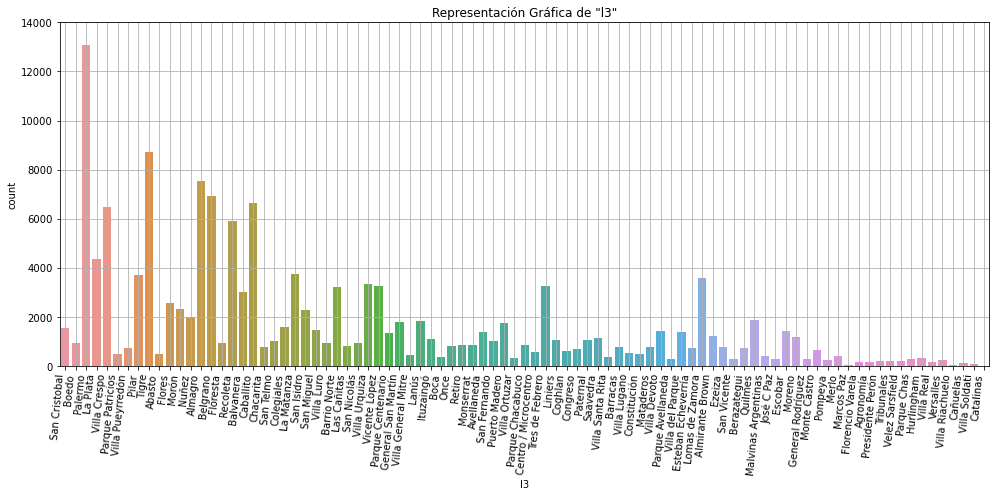

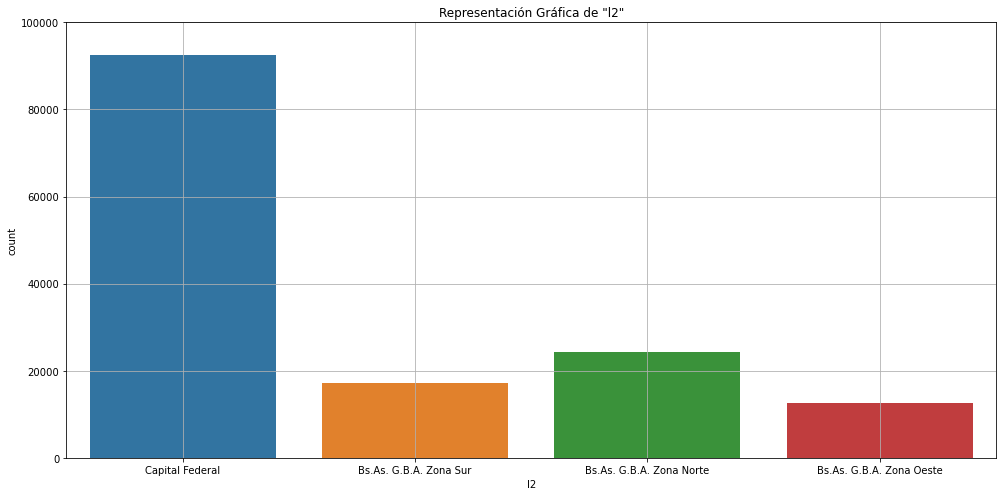

In [85]:
# Graficamos las variables l2 y l3 para observar graficamente su distribución

plt.figure(figsize = (27,7))
plt.subplot(1,2,1)
ax=sns.countplot(data = data, x = "l3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=85, ha="right")
plt.title('Representación Gráfica de "l3"')
plt.tight_layout()
plt.ylim(0,14000)
plt.grid()

plt.figure(figsize = (27,7))
plt.subplot(1,2,2)
ax=sns.countplot(data = data, x = "l2")
plt.title('Representación Gráfica de "l2"')
plt.tight_layout()
plt.ylim(0,100000)
plt.grid()

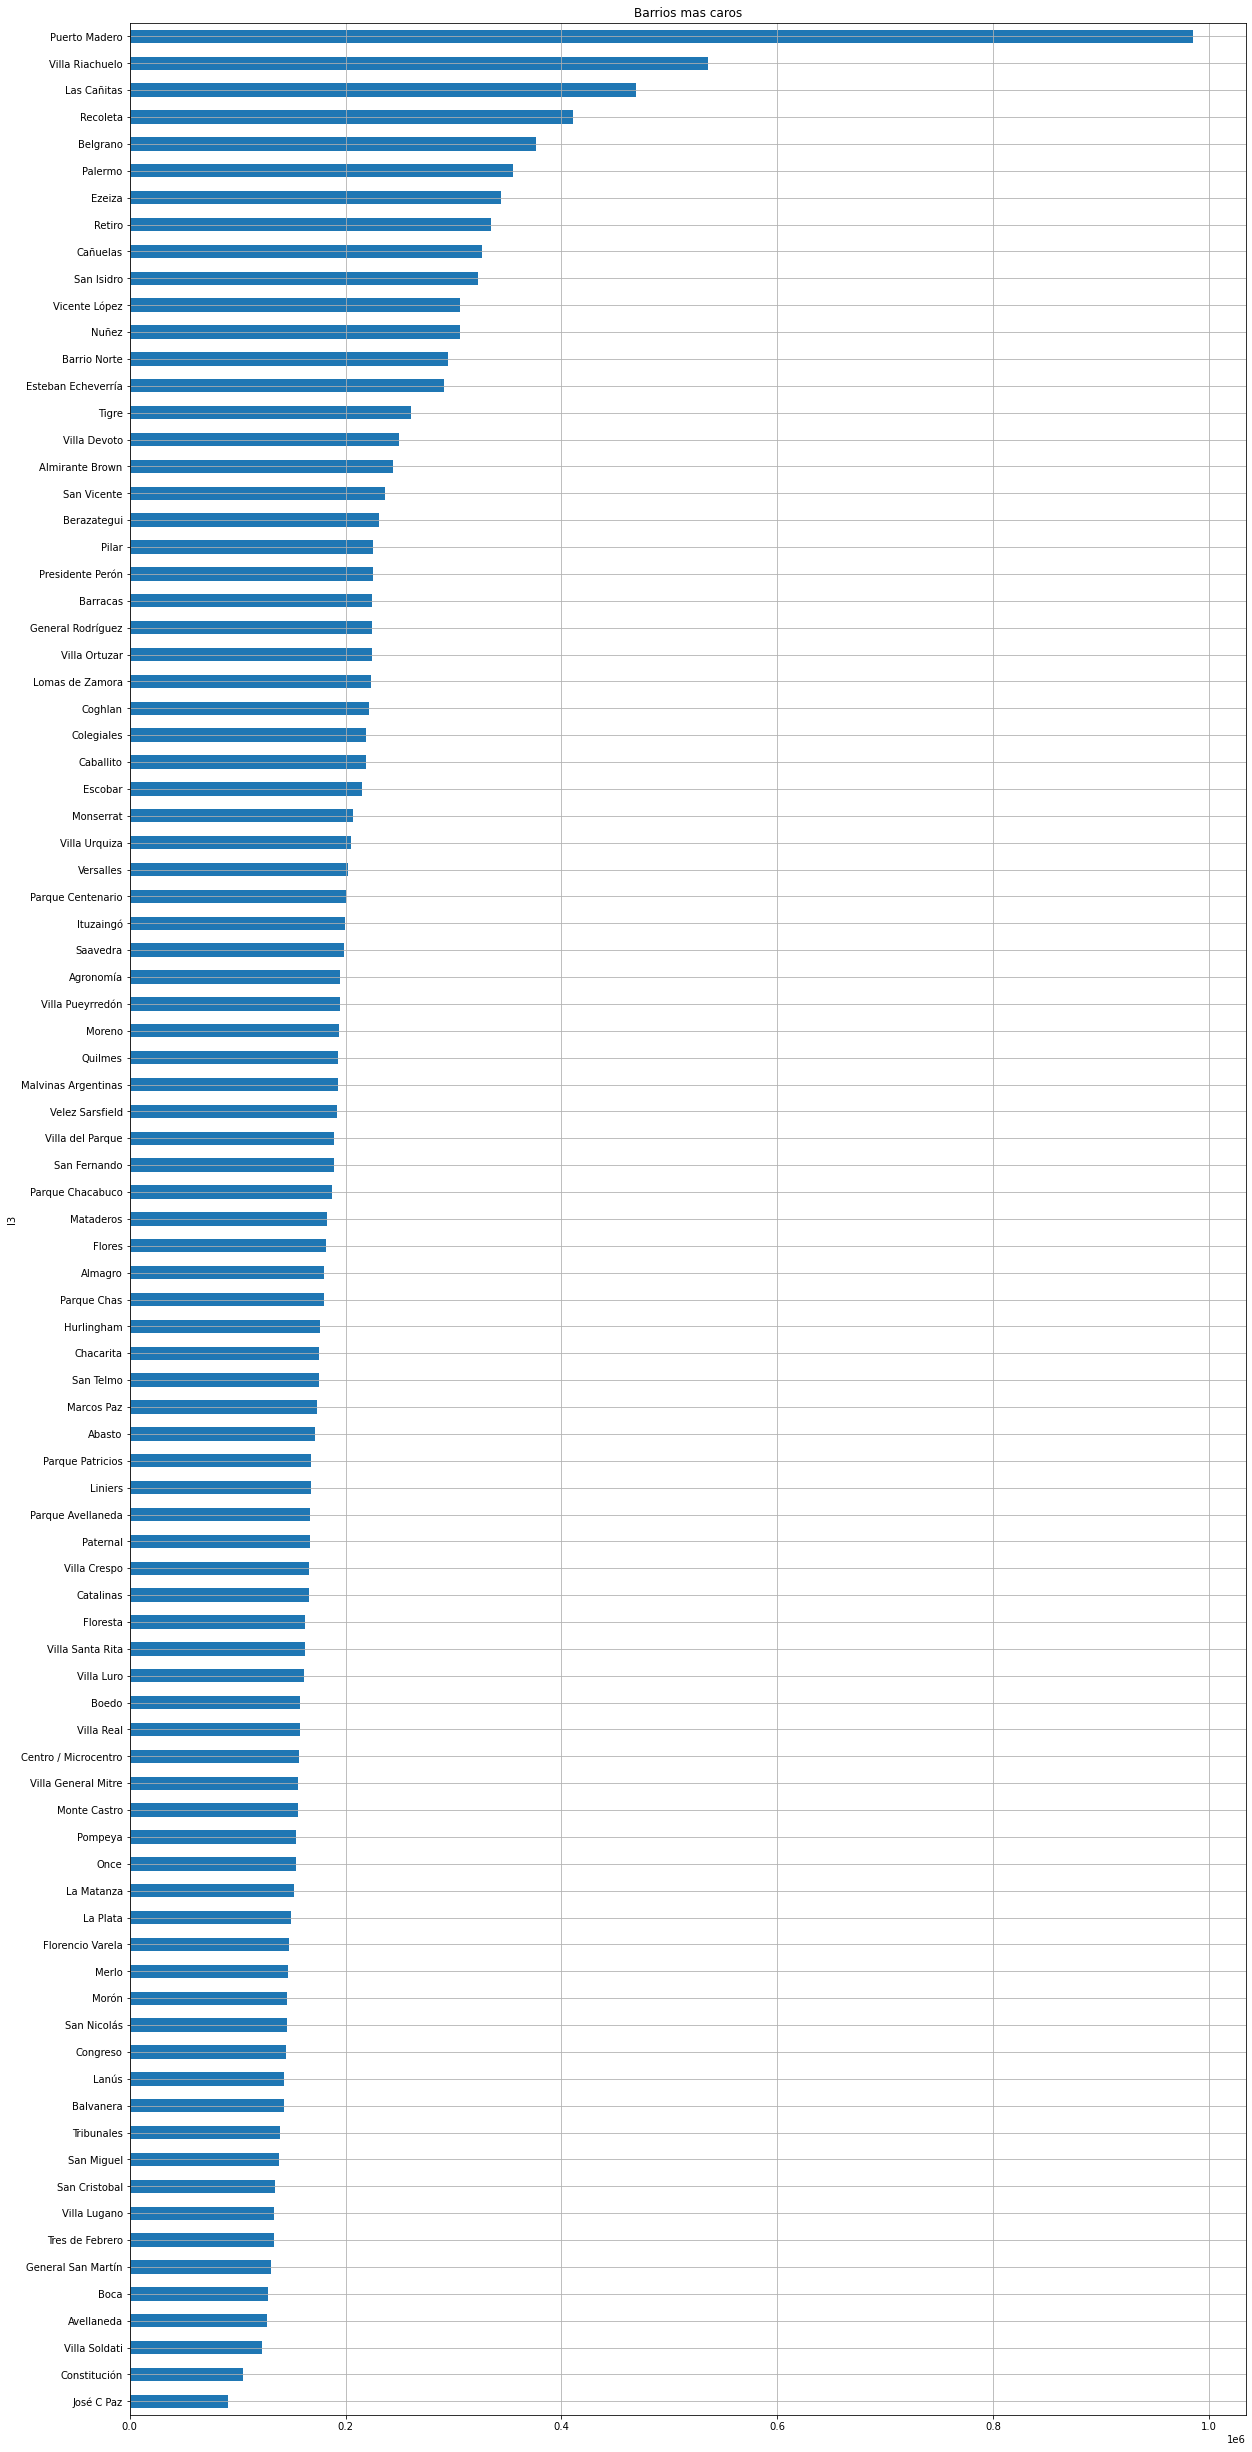

In [86]:
#Agrupamos el Dataset por la media de precios por las ciudades del Dataset
plt.figure(figsize=(20,44))
data.price.groupby([data["l3"]]).mean().sort_values(ascending=True).plot(kind="barh", title="Barrios mas caros")
plt.grid()

In [87]:
#Observamos el precio promedio por barrio
barrio_price=pd.DataFrame(data.groupby(data.l3,sort=True)["price"].mean().reset_index(name="Precio Promedio"))
barrio_price.sort_values(by=["Precio Promedio"], ascending=True,inplace=True, ignore_index=True)
barrio_price[0:10]

,l3,Precio Promedio
0,José C Paz,91501.874564
1,Constitución,104534.073840
2,Villa Soldati,122472.463768
3,Avellaneda,127272.403650
4,Boca,128428.273504
5,General San Martín,130601.519488
6,Tres de Febrero,133440.764506
7,Villa Lugano,134125.596899
8,San Cristobal,134775.299935
9,San Miguel,138073.980000


In [88]:
#Observamos el precio promedio por zona
zona_price=pd.DataFrame(data.groupby(data.l2,sort=True)["price"].mean().reset_index(name="Precio Promedio"))
zona_price.sort_values(by=["Precio Promedio"], ascending=False,inplace=True, ignore_index=True)
zona_price[0:10]

,l2,Precio Promedio
0,Capital Federal,261272.120209
1,Bs.As. G.B.A. Zona Norte,241528.786879
2,Bs.As. G.B.A. Zona Sur,195350.772783
3,Bs.As. G.B.A. Zona Oeste,156328.917259


#### Exploración de la distribución de los datos de las columnas de interés

rooms float64


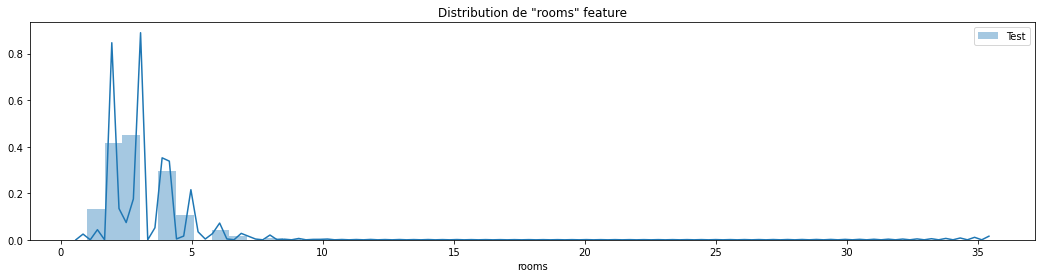

bedrooms float64


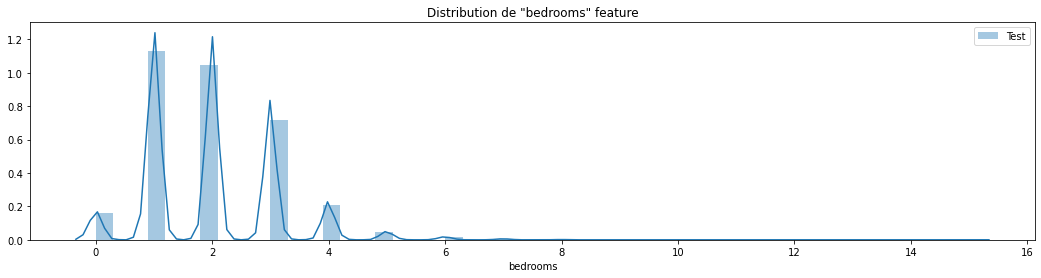

bathrooms float64


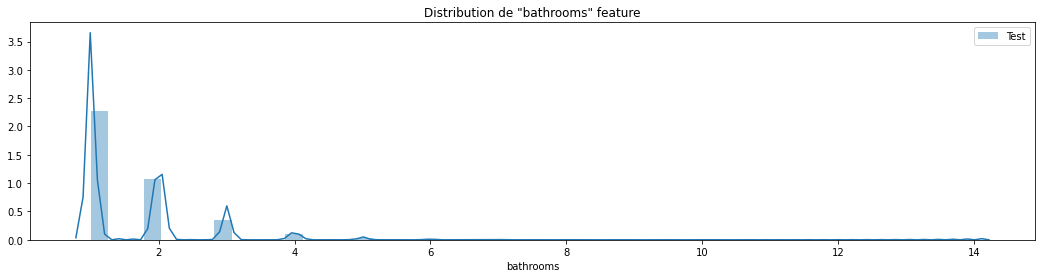

surface_total float64


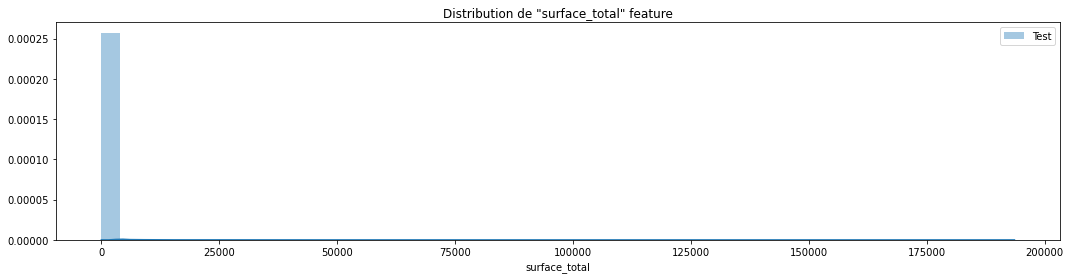

surface_covered float64


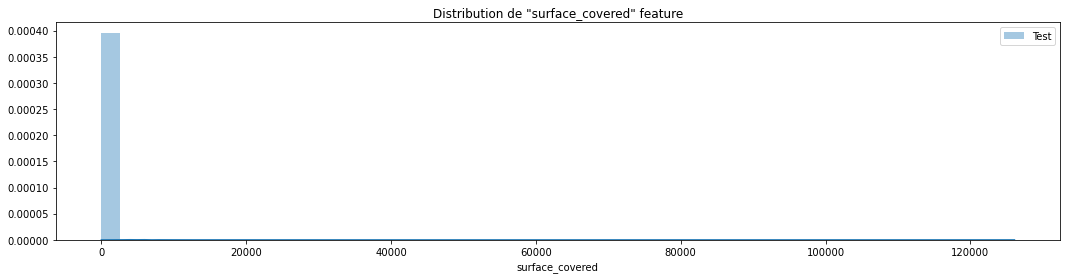

price float64


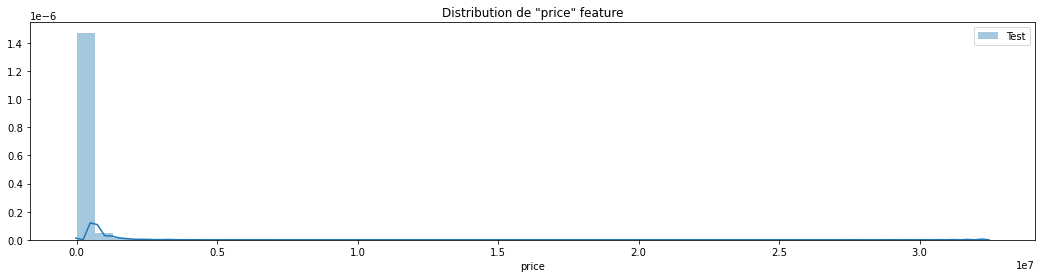

In [89]:
#Observamos la distribución de los datos númericos de las columnas de interés

for col in data.drop(columns=["start_date","end_date","created_on", "l1","l2","l3","lat","lon"]).columns.to_list():
# for col in data.columns():
    if data[col].dtype != 'object':
        print(col, data[col].dtype)
        plt.figure(figsize=(18,4))
        
#         chart = sns.distplot(data[col], label='Train')
        chart = sns.distplot(data[col], label='Test')
        
        chart.set_title(f'Distribution de "{col}" feature')
        plt.legend()
        plt.show()

In [90]:
#Observamos a detalle los los valores de las columnas bathrooms y bedrooms
bathrooms_count=pd.DataFrame(data.groupby("bathrooms",sort=True)["bathrooms"].count().reset_index(name="Total"))
bathrooms_count.sort_values(by=["Total"], ascending=False,inplace=True, ignore_index=True)
bathrooms_count

,bathrooms,Total
0,1.0,82982
1,2.0,39068
2,3.0,13058
3,4.0,3949
4,5.0,1167
5,6.0,316
6,7.0,107
7,8.0,17
8,10.0,12
9,9.0,10


In [91]:
bedrooms_count=pd.DataFrame(data.groupby("bedrooms",sort=True)["bedrooms"].count().reset_index(name="Total"))
bedrooms_count.sort_values(by=["Total"], ascending=False,inplace=True, ignore_index=True)
bedrooms_count

,bedrooms,Total
0,1.0,49705
1,2.0,46010
2,3.0,31459
3,4.0,9078
4,0.0,7138
5,5.0,2074
6,6.0,768
7,7.0,258
8,8.0,65
9,9.0,32


## PARTE A:Transformación de Datos

In [135]:
#De acuerdo a la distribición de los datos graficados en el punto anterior, definimos una variable con estos para proceder a escalarnos
scal=data[["lat","lon","rooms","bedrooms","bathrooms","surface_total","surface_covered","price"]]

In [136]:
#Selccionamos RobustScaler ya que los datos a escalar presentan distribuciones asimetricas
from sklearn.preprocessing import RobustScaler
scl=RobustScaler()

In [137]:
scal=scl.fit_transform(scal)

In [138]:
scal=pd.DataFrame(scal, columns=["lat","lon","rooms","bedrooms","bathrooms","surface_total","surface_covered","price"])

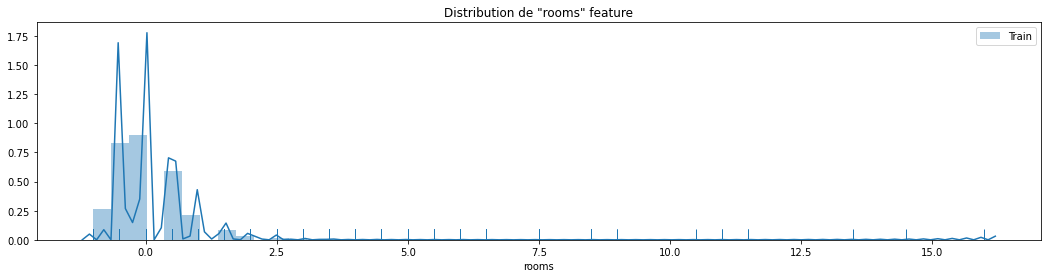

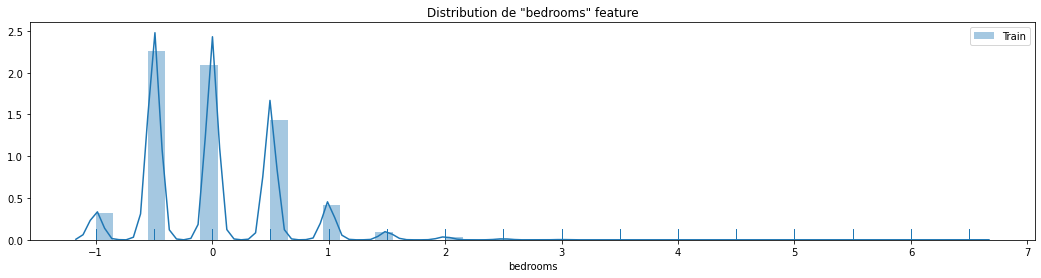

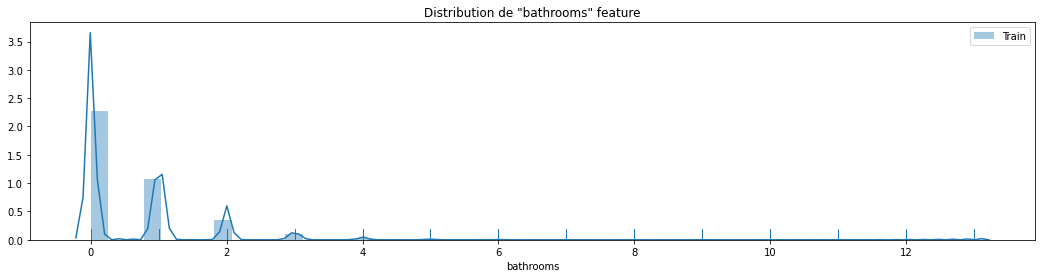

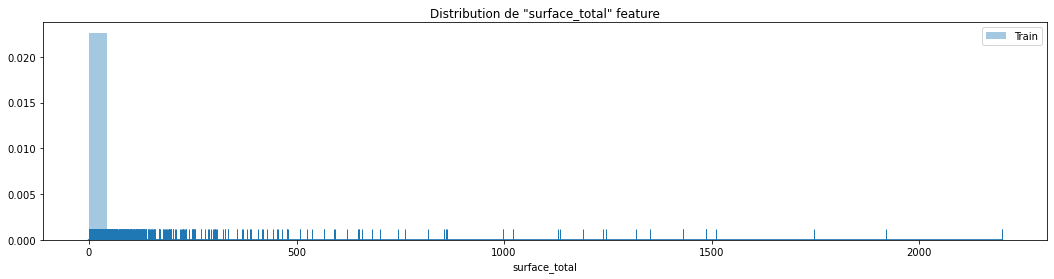

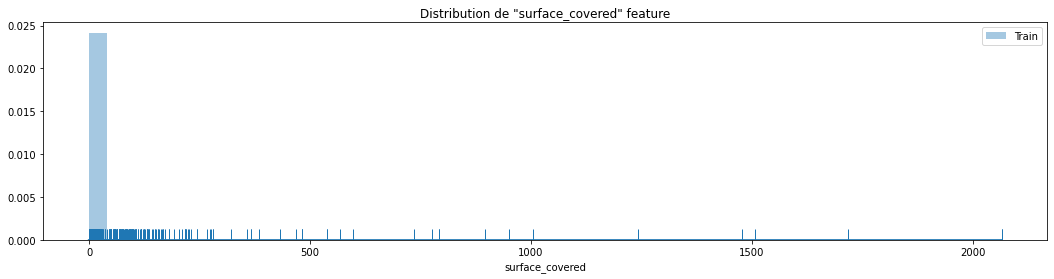

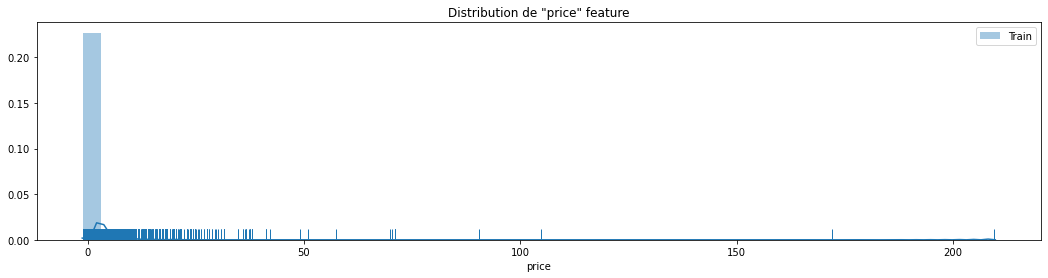

In [96]:
#Observamos la distribución nuevamente ya con los datos escalados

for col in scal.drop(columns=["lat","lon"]).columns.to_list():
# for col in scal: #.columns(["lat","lon","rooms","bedrooms","bathrooms","surface_total","surface_covered","price"])
# for col in data.columns():
    if scal[col].dtype != 'object':
#         print(col, data[col].dtype)
        plt.figure(figsize=(18,4))
        
        chart = sns.distplot(scal[col], label='Train',rug=True,)
        
        
        chart.set_title(f'Distribution de "{col}" feature')
        plt.legend()
        plt.show()

### Imputación de datos faltantes

In [139]:
#Seleccionamos KNNImputer para imputar los datos faltantes del dataset, definiendo 5 como el número de vecinos a considerar
from sklearn.impute import KNNImputer
imputar=KNNImputer(n_neighbors=5,
    weights='uniform',
    metric='nan_euclidean')

In [140]:
scal=imputar.fit_transform(scal)

In [141]:
imp=pd.DataFrame(scal, columns=["lat","lon","rooms","bedrooms","bathrooms","surface_total","surface_covered","price"])

In [142]:
imp.head(3)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,-0.093033,0.604741,2.0,2.5,1.0,0.704545,1.180328,-0.084416
1,-0.435537,0.323064,-0.5,-0.5,1.0,-0.090909,-0.163934,-0.045455
2,0.138952,0.163731,-0.5,-0.5,0.0,-0.375000,-0.377049,-0.266234


In [143]:
#Regresamos los datos escalados a su forma original
scal=scl.inverse_transform(scal)

In [144]:
scal=pd.DataFrame(scal, columns=["lat2","lon2","rooms2","bedrooms2","bathrooms2","surface_total2",
                                 "surface_covered2","price2"])

In [145]:
scal.head(3)

,lat2,lon2,rooms2,bedrooms2,bathrooms2,surface_total2,surface_covered2,price2
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0


In [146]:
#Concatenamos los datos imputados con los restantes
data = pd.concat([data, scal], axis=1)

In [147]:
#Borramos los datos 
data = data.drop(["lat","lon","bathrooms","surface_covered","surface_total","price2","rooms2","bedrooms2"], axis=1)

In [148]:
data.bathrooms2=data.bathrooms2.round()

In [149]:
data.bathrooms2.unique()

array([ 2.,  1.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 11., 10., 14., 12.,
       13.])

In [150]:
data.head(3)

,start_date,end_date,created_on,l1,l2,l3,rooms,bedrooms,price,currency,title,description,property_type,operation_type,lat2,lon2,bathrooms2,surface_total2,surface_covered2
0,2019-10-17,2019-12-23,2019-10-17,Argentina,Capital Federal,San Cristobal,7.0,7.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,-34.605880,-58.384949,2.0,140.0,140.0
1,2019-10-17,2019-11-21,2019-10-17,Argentina,Capital Federal,Boedo,2.0,1.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,-34.624056,-58.412110,2.0,70.0,58.0
2,2019-10-17,2019-11-01,2019-10-17,Argentina,Capital Federal,Palermo,2.0,1.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,-34.593569,-58.427474,1.0,45.0,45.0


In [151]:
data.isnull().sum()

start_date          0
end_date            0
created_on          0
l1                  0
l2                  0
l3                  0
rooms               0
bedrooms            0
price               0
currency            0
title               0
description         0
property_type       0
operation_type      0
lat2                0
lon2                0
bathrooms2          0
surface_total2      0
surface_covered2    0
dtype: int64

In [152]:
data.describe()

,rooms,bedrooms,price,lat2,lon2,bathrooms2,surface_total2,surface_covered2
count,146660.000000,146660.000000,1.466600e+05,146660.000000,146660.000000,146660.000000,146660.000000,146660.000000
mean,3.079817,1.983240,2.412211e+05,-34.604939,-58.466917,1.599618,218.989703,117.132755
std,1.416352,1.151304,3.185195e+05,0.473595,0.511383,0.889306,1931.293311,899.658919
min,1.000000,0.000000,5.500000e+03,-35.318457,-180.000000,1.000000,10.000000,1.000000
25%,2.000000,1.000000,1.110000e+05,-34.628606,-58.504220,1.000000,51.000000,46.000000
50%,3.000000,2.000000,1.660000e+05,-34.601173,-58.444105,1.000000,79.000000,67.000000
75%,4.000000,3.000000,2.650000e+05,-34.575386,-58.408498,2.000000,143.000000,108.400000
max,35.000000,15.000000,3.243423e+07,85.051129,-57.805832,14.000000,193549.000000,126062.000000


### Eliminación de errores en el dataset

In [153]:
# Número de registros donde superficie construida es mayor a la superficie total

Errores= data[data.surface_total2 < data.surface_covered2]

Errores.shape

(2751, 19)

In [154]:
#Borramos los errores identificados en el punto anterior
data=data.drop(data[data.surface_total2 < data.surface_covered2].index)

In [155]:
data.shape

(143909, 19)

### Eliminación de outliers

In [156]:
#Eliminación de valores atípicos por Regla de 3 sigmas (price)
valor_medio = data.price.mean()
std = data.price.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
outliers_price = ((data.price < minimo) | (data.price > maximo))

In [157]:
data=data.drop(data[(data.price < minimo) | (data.price > maximo)].index)

In [158]:
#Eliminación de valores atípicos por Regla de 3 sigmas (surface total)
valor_medio = data.surface_total2.mean()
std = data.surface_total2.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
outliers_st = ((data.surface_total2 < minimo) | (data.surface_total2 > maximo))

In [159]:
data=data.drop(data[(data.surface_total2 < minimo) | (data.surface_total2 > maximo)].index)

In [160]:
#Eliminación de valores atípicos por Regla de 3 sigmas (surface covered)
valor_medio = data.surface_covered2.mean()
std = data.surface_covered2.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
outliers_sc = ((data.surface_covered2 < minimo) | (data.surface_covered2 > maximo))

In [161]:
data=data.drop(data[(data.surface_covered2 < minimo) | (data.surface_covered2 > maximo)].index)

In [175]:
data.shape

(140441, 19)

In [163]:
data1=data

De acuerdo al siguiente artículo, definimos las superficies menores a 19 mts2 como valores erroneos o atipicos para Departamentos, PH, Oficina, Casa y Lote y menores a 14 mts2 para Casa de Campo, Otro, Local Comercial, Chochera y Depósito

https://www.tiempoar.com.ar/nota/la-vida-en-18-m2-una-ley-a-medida-del-negocio-inmobiliario

In [176]:
#Eliminación de valores atipicos por tipo de propiedad
datap=data[(data.property_type=="Departamento")|(data.property_type=="PH")|(data.property_type=="Oficina")|
           (data.property_type=="Casa")|(data.property_type=="Lote")]

In [165]:
datap.shape

(139185, 19)

In [177]:
#Eliminamos los datos con superfices menor a 19 metros cuadrados de los tipo de propiedades seleccionados
datap=datap.drop(datap[(datap.surface_covered2 < 19) | (datap.surface_total2 < 19)].index)

In [178]:
datap1=data[(data.property_type=="Casa de Campo")|(data.property_type=="Otro")|(data.property_type=="Local Comercial")|
           (data.property_type=="Cochera")|(data.property_type=="Deposito")]

In [168]:
datap1.shape

(503, 19)

In [179]:
datap1=datap1.drop(datap1[(datap1.surface_covered2 < 14) | (datap1.surface_total2 < 14)].index)

In [180]:
data=pd.concat([datap1,datap],axis=0)

In [181]:
print(data.shape)
data.head(2)

(139412, 19)


,start_date,end_date,created_on,l1,l2,l3,rooms,bedrooms,price,currency,title,description,property_type,operation_type,lat2,lon2,bathrooms2,surface_total2,surface_covered2
1180,2019-12-30,2020-01-19,2019-12-30,Argentina,Capital Federal,Retiro,7.0,3.0,1050000.0,USD,Importante Piso de Categoría!! con Cochera/Bau...,Corredor Responsable: OSCAR N. LIBERMAN - CUCI...,Otro,Venta,-34.593615,-58.376386,3.0,354.0,354.0
1417,2019-07-08,2019-08-17,2019-07-08,Argentina,Bs.As. G.B.A. Zona Oeste,General Rodríguez,3.0,2.0,90000.0,USD,"Si buscas tranquilidad , no dejes de verla .",Corredor Responsable: Hernan Perrone - CMCPDJM...,Otro,Venta,-34.578254,-58.978349,1.0,3284.0,83.0


De acuerdo a la distribución de los datos de las columnas bedrooms y bathrooms2, eliminamos sus valores atipico, definiendo como 9 el valor mas alto de estos

In [182]:
data = data[data.bedrooms<9]

In [184]:
data = data[data.bathrooms2<9]

In [322]:
data.shape

(139336, 19)

In [325]:
data.to_csv("properati_N",  index= False)    #para no empezar desde el principio

In [338]:
data1=pd.read_csv("properati_N")

In [339]:
print(data1.shape)
data1.describe()

(139336, 19)


,rooms,bedrooms,price,lat2,lon2,bathrooms2,surface_total2,surface_covered2
count,139336.000000,139336.000000,1.393360e+05,139336.000000,139336.000000,139336.000000,139336.000000,139336.000000
mean,3.028995,1.947716,2.122249e+05,-34.604232,-58.466630,1.551272,139.613332,85.444844
std,1.316656,1.085719,1.586672e+05,0.480873,0.522926,0.801189,244.313402,59.933506
min,1.000000,0.000000,5.500000e+03,-35.150806,-180.000000,1.000000,15.000000,15.000000
25%,2.000000,1.000000,1.100000e+05,-34.628146,-58.503580,1.000000,51.000000,46.000000
50%,3.000000,2.000000,1.650000e+05,-34.601070,-58.444211,1.000000,78.000000,66.000000
75%,4.000000,3.000000,2.590000e+05,-34.575569,-58.409797,2.000000,135.000000,102.000000
max,35.000000,8.000000,1.194059e+06,85.051129,-57.805832,8.000000,6000.000000,443.600000


Lo siguiente que realizaremos es utilizar One Hot Encocer para binarizar las variables categóricas a utilizar con el modelo de machine learning

In [340]:
from sklearn.preprocessing import OneHotEncoder
Encoding=OneHotEncoder(sparse=False,drop="first")
OHE=Encoding.fit_transform(data1[["l2","l3","property_type"]])

In [341]:
OHE = pd.DataFrame(OHE, columns=Encoding.get_feature_names())

In [342]:
#Observamos el número de columnas transformadas
OHE.shape

(139336, 97)

In [306]:
# data1=data1.drop(["l1","l2","l3","property_type","start_date","end_date","created_on","operation_type"],axis="columns")

In [343]:
#Juntamos las columnas binarizadas con las restantes

data2=data1.drop(data1[["l1","l2","l3","property_type","start_date","end_date","created_on","operation_type"]],axis=1).join(OHE)

In [345]:
data2.tail(3)

,rooms,bedrooms,price,currency,title,description,lat2,lon2,bathrooms2,surface_total2,...,x1_Villa Santa Rita,x1_Villa Soldati,x1_Villa Urquiza,x1_Villa del Parque,x2_Cochera,x2_Departamento,x2_Lote,x2_Oficina,x2_Otro,x2_PH
139333,1.0,1.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",-34.444633,-58.981606,1.0,50.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
139334,2.0,1.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,-34.444830,-58.981796,1.0,38.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
139335,3.0,2.0,98000.0,USD,Departamento en venta en Manzanares Chico,"Departamento en el Barrio Manzanares Chico , e...",-34.444760,-58.981885,1.0,75.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Reducción de dimensionalidad con PCA

In [346]:
#Definimos una variable seleccionando las columnas a reducir su dimensionalidad(solo se seleccionaron las columnas binarizadas)
RD=data2.drop(['rooms', 'bedrooms', 'price', 'currency', 'title', 'description',
       'lat2', 'lon2', 'bathrooms2', 'surface_total2',"surface_covered2"],axis=1)

In [347]:
#Importamos PCA para reducir la dimensionalidad de las columnas binarizadas
from sklearn.decomposition import PCA

In [348]:
#Selccionamos el porcentaje a considerar para reducir la dimensionalidad (87%)
pca = PCA(.87)
X_nuevo = pca.fit_transform(RD) 

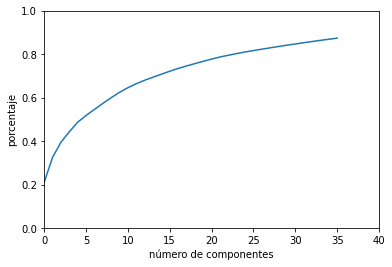

In [350]:
#Observamos el número de columnas o componentes tomados con el porcentaje elegido
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('porcentaje')
plt.xlim(0,40)
plt.ylim(0,1)
plt.show()

In [351]:
X_nuevo=pd.DataFrame(X_nuevo)

In [352]:
#Elegímos las columnas a utilizar para el modelo de machine learning
data2=data2[['rooms', 'bedrooms', 'price','lat2', 'lon2', 'bathrooms2', 'surface_total2',"surface_covered2"]]

In [353]:
data2.columns

Index(['rooms', 'bedrooms', 'price', 'lat2', 'lon2', 'bathrooms2',
       'surface_total2', 'surface_covered2'],
      dtype='object')

In [354]:
#Concatenamos las variables elegidas con los principales componentes transformados para utilizar en el modelo de machine learning
data2=pd.concat([data2,X_nuevo],axis=1)

In [355]:
print(data2.shape)
data2.head(3)

(139336, 44)


,rooms,bedrooms,price,lat2,lon2,bathrooms2,surface_total2,surface_covered2,0,1,...,26,27,28,29,30,31,32,33,34,35
0,7.0,3.0,1050000.0,-34.593615,-58.376386,3.0,354.0,354.0,0.068995,0.629689,...,-0.040805,-0.051047,-0.002170,-0.019294,-0.007219,0.010561,-0.042674,0.041341,-0.126926,-0.065591
1,3.0,2.0,90000.0,-34.578254,-58.978349,1.0,3284.0,83.0,0.992263,0.120685,...,-0.044411,-0.001170,-0.005283,-0.014424,-0.123162,0.022887,0.129276,-0.011946,-0.003650,-0.008432
2,4.0,3.0,249000.0,-34.467206,-58.858964,3.0,1198.0,185.8,0.835488,0.148224,...,-0.072518,-0.005468,0.005288,-0.002749,-0.008382,0.003333,-0.028275,0.006509,-0.012148,-0.064978


In [356]:
data2.to_csv("properati_N1",  index= False) 

## PARTE B: Modelos Avanzados de Machine learning

In [2]:
data2=pd.read_csv("properati_N1")

In [3]:
print(data2.shape)
data2.head(3)

(139336, 44)


,rooms,bedrooms,price,lat2,lon2,bathrooms2,surface_total2,surface_covered2,0,1,...,26,27,28,29,30,31,32,33,34,35
0,7.0,3.0,1050000.0,-34.593615,-58.376386,3.0,354.0,354.0,0.068995,0.629689,...,-0.040805,-0.051047,-0.002170,-0.019294,-0.007219,0.010561,-0.042674,0.041341,-0.126926,-0.065591
1,3.0,2.0,90000.0,-34.578254,-58.978349,1.0,3284.0,83.0,0.992263,0.120685,...,-0.044411,-0.001170,-0.005283,-0.014424,-0.123162,0.022887,0.129276,-0.011946,-0.003650,-0.008432
2,4.0,3.0,249000.0,-34.467206,-58.858964,3.0,1198.0,185.8,0.835488,0.148224,...,-0.072518,-0.005468,0.005288,-0.002749,-0.008382,0.003333,-0.028275,0.006509,-0.012148,-0.064978


In [54]:
#Realicé una muestra para medir tiempos y obtener score de las hiperparametros probados
#data3=data2.sample(1000) 

In [55]:
# print(data3.shape)
# data3.head()

In [4]:
# Definimos y seleccionamos los features y la target para ocupar en nuestro modelo Randon Forest
X = data2.drop(['price'],axis=1)
y = data2.price

In [5]:
# Definimos y seleccionamos los features y la target para ocupar en nuestro modelo con Regresion Polinómica
XT = data2.drop(['price'],axis=1)
yT = data2.price

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
StScal=StandardScaler()
Rscal=RobustScaler()

In [7]:
#Escalamos datos para los modelos Ridge y Lasso
XT=Rscal.fit_transform(XT)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Dividimos los datos en Train y Test para Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42 )
# Dividimos los datos en Train y Test para Regresión Polinómica
X_trainR, X_testR, y_trainR, y_testR = train_test_split(XT, yT, test_size=.3, random_state=42 )

In [10]:
#Importamos los modelos a utilizar
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso

In [51]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [47]:
#Antes de seguir con el modelo, realizaremos el modelo ocupado en el proyecto 1, con los datos transformados del presente proyecto
from sklearn.tree import DecisionTreeRegressor
tree_regressorP = DecisionTreeRegressor(max_depth=13, random_state=42)

In [48]:
tree_regressorP.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=13, random_state=42)

Modelo: Árbol de Decisión
R2_Score en Train: 0.8884571579466084
R2_Score en Test: 0.811823419664845


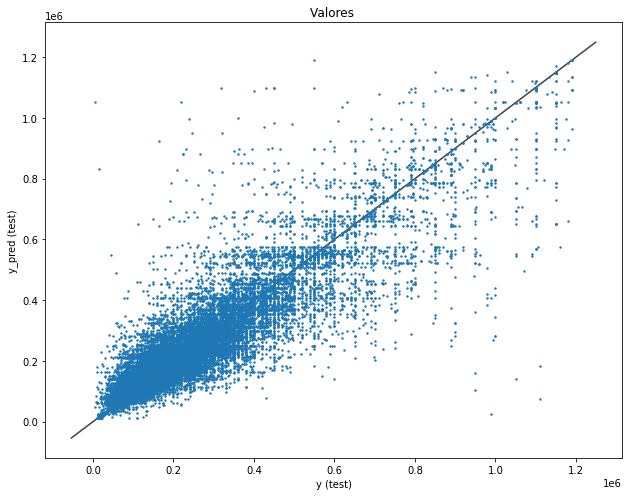

In [49]:
#Predecimos y graficamos el modelo
modelos = ['Árbol de Decisión']

for i, model in enumerate([tree_regressorP]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f'R2_Score en Train: {r2_train}')
    print(f'R2_Score en Test: {r2_test}')
    
    plt.figure(figsize = (17,7))

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    plt.title('Valores ')
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

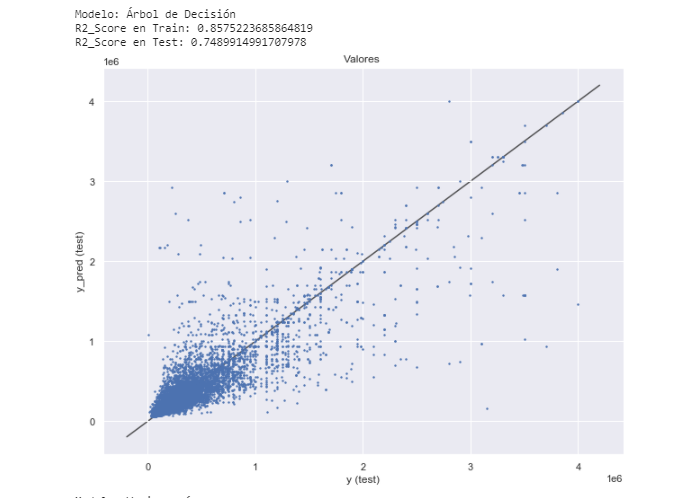

In [50]:
#Resultados del modelo del proyecto 01
Image(r"C:\Users\jorge\Documents\Data Science\Resultado modelo 1.png")

Como podemos ver en las 2 gráficas anteriores, el modelo mejora considerablemente, y a mi parecer este se debe a que se consideraron todas las features posibles, además de que se tuvo mas análisis en el tipo de datos por cada feature

In [11]:
#Ya visto los resultados del modelo anterior procedemos con modelos avanzados
RF=RandomForestRegressor()
RDG=Ridge()
Las=Lasso()


In [12]:
# Elegimos los hiperparametros a optimizar para RandomForest
#Opción 1 de hiperparametros (no se logró correr se intentó en múltiples ocasiones y no se terminó, se probó hasta 20 hrs)
paramRF={"criterion":["mse", "mae"],
       "max_depth":[9,12,15,17,20,23,27,31,37,42,47,55,60,64,67,71],"oob_score":[True,False], "max_features":["auto", "sqrt"]}
#Opción 2
paramRF2={"criterion":["mse", "mae"],
       "max_depth":[12,17,23,27,31,37,47,55,60,67,71],"oob_score":[True]}

In [13]:
# Hiperparametros a optimizar para los modelos restantes
paramRL={"alpha":np.linspace(-2, 2, 2000)}

In [14]:
#Elegimos RandomizedSearchCV para buscar los mejores hiperparametros 
from sklearn.model_selection import RandomizedSearchCV

In [15]:
#Random Serach para Random Forest
modelRF = RandomizedSearchCV(RF, paramRF2,n_iter=10, random_state=0,cv=3, n_jobs=-1, return_train_score=True,
                           verbose=3)

ModelRidge = RandomizedSearchCV(RDG, paramRL,n_iter=20, random_state=0,cv=4, n_jobs=-1, return_train_score=True,
                           verbose=5)
ModelLasso = RandomizedSearchCV(Las, paramRL,n_iter=20, random_state=0,cv=4, n_jobs=-1, return_train_score=True,
                           verbose=5)


In [16]:
ModelRidge.fit(X_trainR, y_trainR)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   15.0s finished


RandomizedSearchCV(cv=4, estimator=Ridge(), n_iter=20, n_jobs=-1,
                   param_distributions={'alpha': array([-2.      , -1.997999, -1.995998, ...,  1.995998,  1.997999,
        2.      ])},
                   random_state=0, return_train_score=True, verbose=5)

In [17]:
ModelLasso.fit(X_trainR, y_trainR)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  3.7min finished


RandomizedSearchCV(cv=4, estimator=Lasso(), n_iter=20, n_jobs=-1,
                   param_distributions={'alpha': array([-2.      , -1.997999, -1.995998, ...,  1.995998,  1.997999,
        2.      ])},
                   random_state=0, return_train_score=True, verbose=5)

In [18]:
print("Mejores parametros Ridge: "+str(ModelRidge.best_params_))
print("Mejor Score: "+str(ModelRidge.best_score_)+'\n')


print("Mejores parametros Lasso: "+str(ModelLasso.best_params_))
print("Mejor Score: "+str(ModelLasso.best_score_)+'\n')


Mejores parametros Ridge: {'alpha': -1.4457228614307154}
Mejor Score: 0.6657635030222679

Mejores parametros Lasso: {'alpha': 1.6578289144572285}
Mejor Score: 0.6657635070315633



In [ ]:
modelRF.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


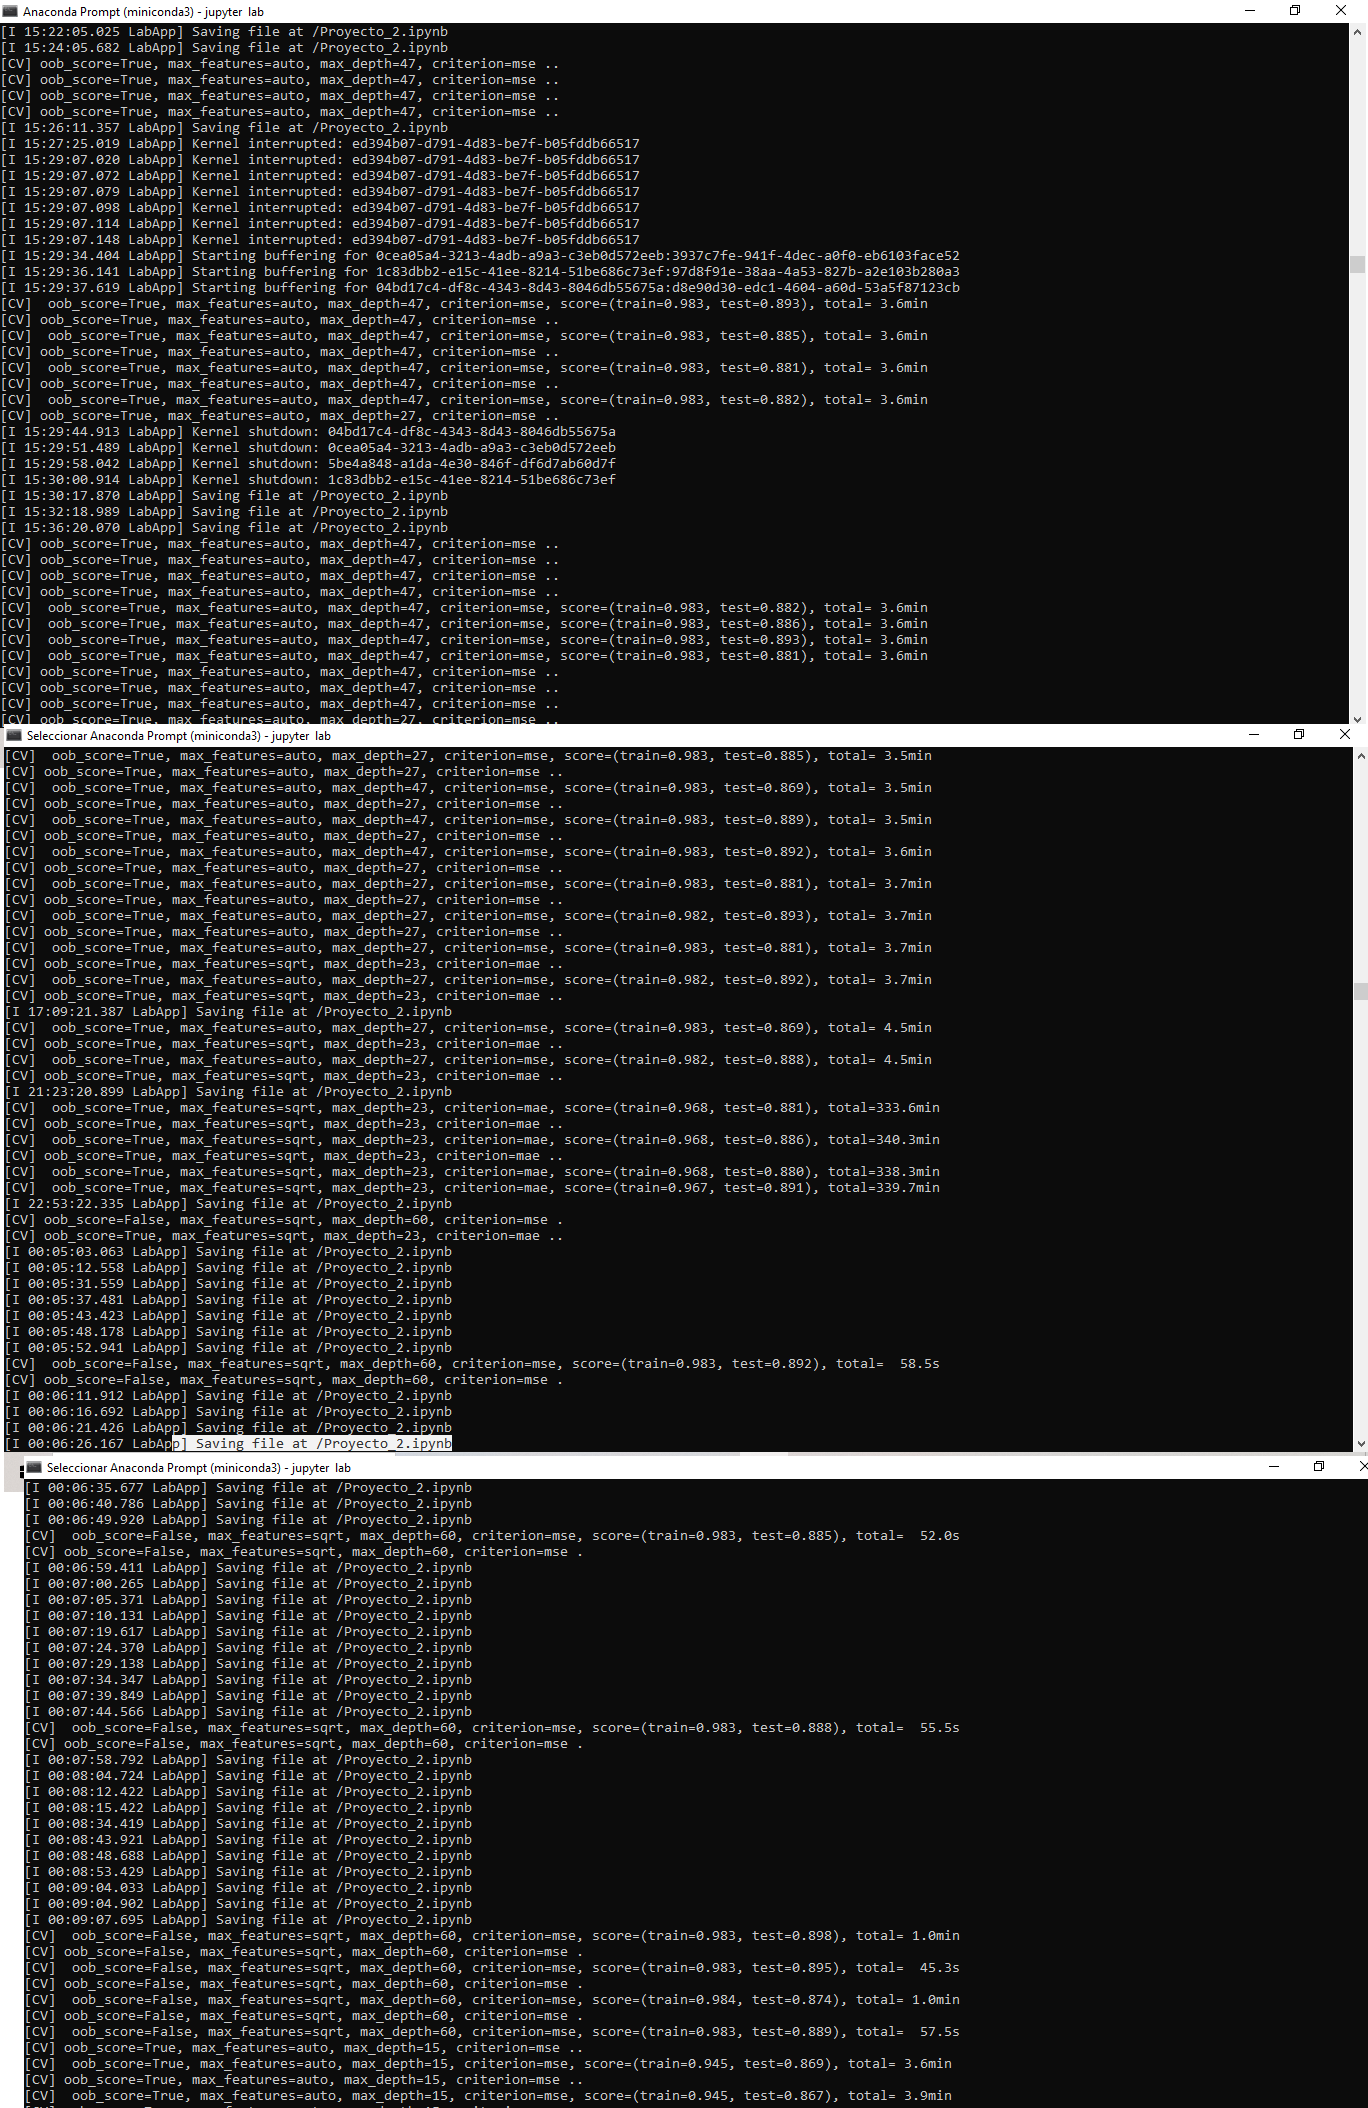

In [35]:
''' Debido a que el RandomizedSearchCV no logró correr (se intentó varias ocasiones espeando hasta lapsos de 24 hrs),
se tomaron los mejores parametros observados del proceso '''

from IPython.display import Image
Image(r"C:\Users\jorge\Documents\Data Science\random search.png")

In [36]:
#Definimos los modelos con  hiperparamtros encontrados derivado del RandomSearch
M_RandomForest =RandomForestRegressor(criterion="mse", max_depth=23,  max_features="sqrt", oob_score=True)
M_Ridge = Ridge(alpha=-1.4457228614307154)
M_Lasso = Lasso(alpha=1.6578289144572285)

In [37]:
M_RandomForest.fit(X_train, y_train)
M_Ridge.fit(X_trainR, y_trainR)
M_Lasso.fit(X_trainR, y_trainR)

Lasso(alpha=1.6578289144572285)

Modelo: Random Forest Regressor
R2_Score en Train: 0.979205330136418
R2_Score en Test: 0.8939651742093426


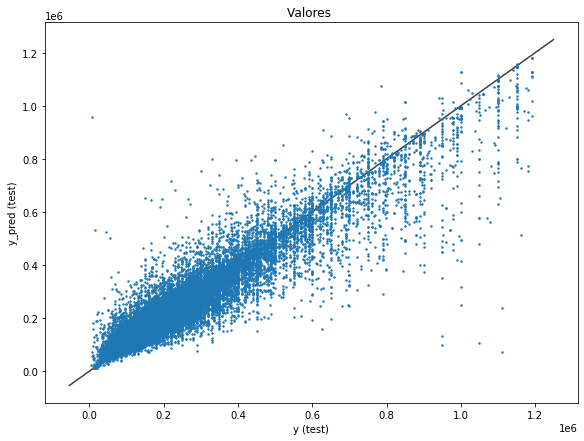

In [39]:
#Predecimos y graficamos los modelos ocupados
modelos = ['Random Forest Regressor', 'Ridge', 'Lasso']

for i, model in enumerate([M_RandomForest]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
   
    
    print(f'Modelo: {modelos[i]}')

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
   
    
    print(f'R2_Score en Train: {r2_train}')
    print(f'R2_Score en Test: {r2_test}')

    
    plt.figure(figsize = (21,7))

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    plt.title('Valores ')
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

Modelo: Ridge
R2_Score en Train: 0.6661905731864044
R2_Score en Test: 0.6617807477674265
Modelo: Lasso
R2_Score en Train: 0.6661905665882291
R2_Score en Test: 0.6617800910228324


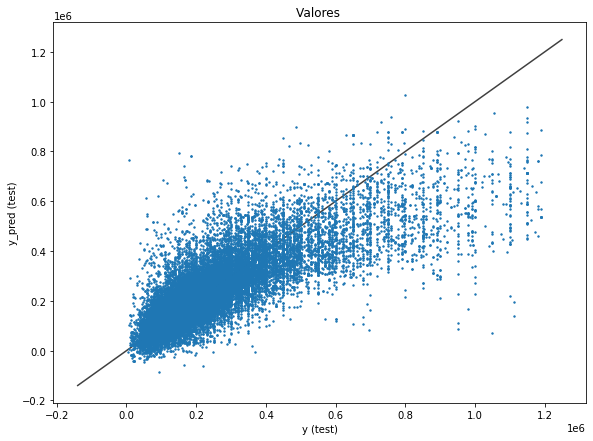

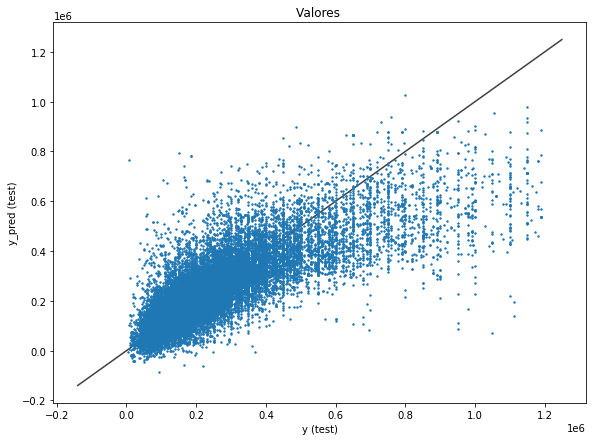

In [41]:
#Predecimos y graficamos los modelos ocupados
modelos = ['Ridge', 'Lasso']

for i, model in enumerate([M_Ridge,M_Lasso]):
    y_train_pred = model.predict(X_trainR)
    y_test_pred = model.predict(X_testR)
   
    
    print(f'Modelo: {modelos[i]}')

    r2_train = r2_score(y_trainR, y_train_pred)
    r2_test = r2_score(y_testR, y_test_pred)
    print(f'R2_Score en Train: {r2_train}')
    print(f'R2_Score en Test: {r2_test}')

    
    plt.figure(figsize = (21,7))

    ax = plt.subplot(1,2,2)
    ax.scatter(y_testR,y_test_pred, s =2)
    plt.title('Valores ')
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

------
De acuerdo a los modelos probados el modelo RandomForestRegressor tiene un mejor rendimiento que el DecisionTreeRegressor ocupado en el proyecto 01, obteniendo aproximandemente un 7% de mejora en los datos de test

-----
# PARTE C

### Variables relevantes de RandomForest

0.8904768717615495


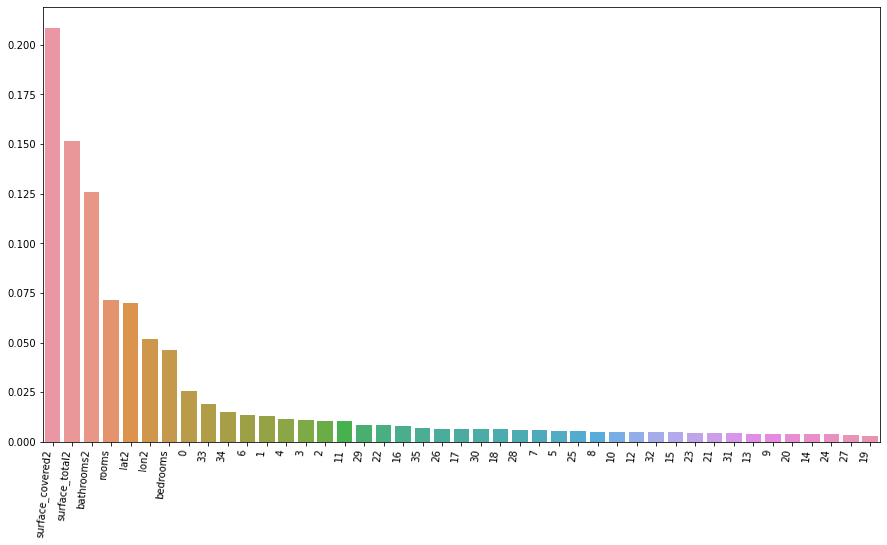

In [54]:
print(M_RandomForest.oob_score_)
importances = M_RandomForest.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

# ax=sns.countplot(data = data, x = "l3")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=85, ha="right")

plt.figure(figsize = (15,8))
ax=sns.barplot(columns[indices], importances[indices], orient="v")
ax.set_xticklabels(ax.get_xticklabels(), rotation=85, ha="right")
plt.show()

Coeficientes de los modelos Ridge y Lasso

In [55]:
print(f'Pendientes Ridge: {M_Ridge.coef_}')
print(f'Ordenada Ridge: {M_Ridge.intercept_}')
print(f'\nPendientes Lasso: {M_Lasso.coef_}')
print(f'Ordenada Lasso: {M_Lasso.intercept_}')

Pendientes Ridge: [ 1.98602457e+04 -2.26395416e+04  5.64142500e+02  9.34760682e+02
  5.76677566e+04 -1.99016581e+03  8.03168215e+04 -7.78779882e+04
 -1.04920825e+03 -3.05122934e+02  7.52480888e+03  1.04094952e+04
 -1.98044710e+03  2.70510401e+03 -1.71450149e+02 -1.14540035e+04
  5.98099552e+03  2.45150903e+02 -1.20868385e+04 -4.79729644e+02
  9.09918841e+00 -1.39806402e+03  1.54076736e+03 -2.48628291e+03
 -1.03669459e+03  5.48537748e+02  2.30378729e+01  1.66394829e+02
 -1.29223397e+03 -1.44283280e+03  7.77474656e+02  9.51404016e+01
  2.61722262e+02 -6.34779017e+02 -7.86715887e+02  5.81328254e+01
  3.08128821e+01  1.02870276e+01 -9.35493488e+01 -9.90093972e+01
  3.08626285e+03  6.15392845e+03  3.96816783e+02]
Ordenada Ridge: 183044.25485527044

Pendientes Lasso: [ 1.98180923e+04 -2.25783627e+04  5.64225607e+02  9.34888689e+02
  5.76656084e+04 -1.99012398e+03  8.03092539e+04 -7.78626635e+04
 -1.04922857e+03 -3.05510549e+02  7.52438926e+03  1.04077404e+04
 -1.98046285e+03  2.70528692e+03 

____________
Elegimos un arbol al azar y observamos que el atributo mas y el menos importantes cambian

In [60]:
Tree_Random=M_RandomForest.estimators_[5]

<function matplotlib.pyplot.show(*args, **kw)>

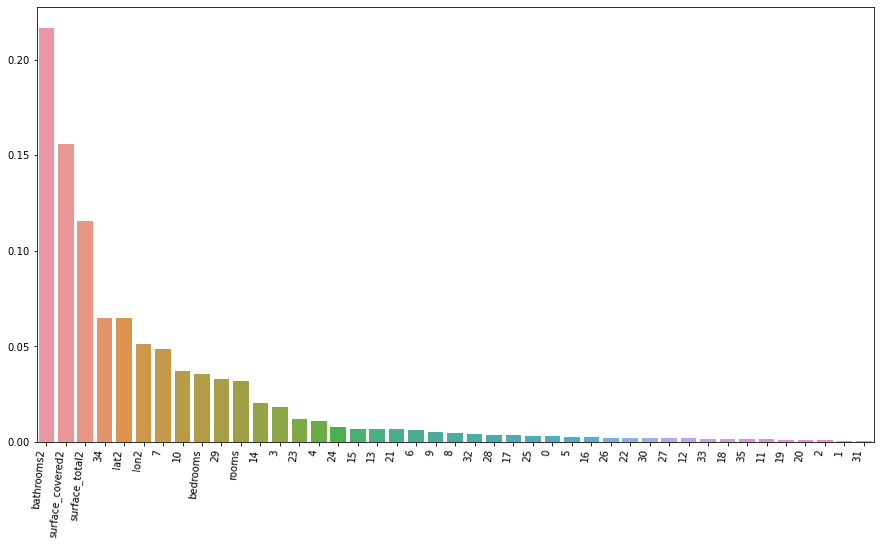

In [62]:
importances = Tree_Random.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

# ax=sns.countplot(data = data, x = "l3")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=85, ha="right")

plt.figure(figsize = (15,8))
ax=sns.barplot(columns[indices], importances[indices], orient="v")
ax.set_xticklabels(ax.get_xticklabels(), rotation=85, ha="right")
plt.show

De acuerdo al proceso realizado considero que el modelo tiene un buen score en test (89%) y es mucho mejor al obtenido en el proyecto 01 (74%)

Con respecto a los errores presentado en los modelos realizados, puedo observar que estos se hacen notar mas en los precios mas altos, donde existen menos registros, por lo que considero que se podría borrar aún mas datos con precios elevados ya que la distribución de la feature "price" tiende hacia la derecha o arriba, aún con la transformación de datos realizada.

In [52]:
import gc

In [66]:
gc.collect()

22